In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNetV2, Xception
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess, decode_predictions as resnet_decode
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess, decode_predictions as inception_decode
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess, decode_predictions as mobilenet_decode
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess, decode_predictions as xception_decode

# Шлях до папки з вашими зображеннями
image_folder = 'l4img/'  # Можете змінити шлях до ваших зображень

# Отримання всіх зображень з папки
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Функція для підготовки зображення
def prepare_image(img_path, target_size, preprocess_function):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_function(img_array)

# Функція для відображення зображень та результатів
def display_predictions(image_path, predictions, model_name):
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{model_name} Predictions')
    plt.show()
    for pred in predictions:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")
    print('-----------------------------------')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


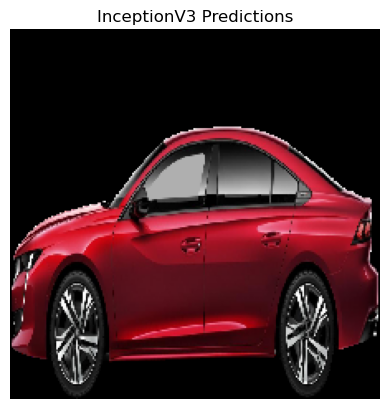

sports_car: 84.93%
car_wheel: 8.37%
grille: 1.28%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


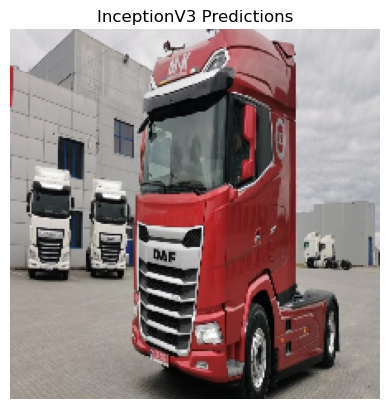

trailer_truck: 86.22%
moving_van: 4.28%
tow_truck: 1.55%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


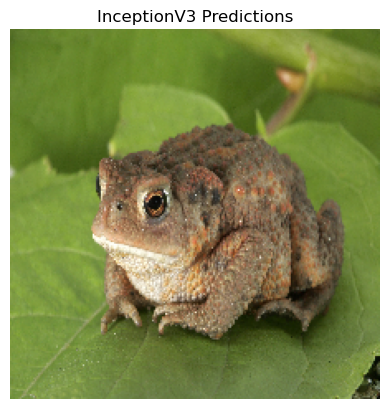

tailed_frog: 69.98%
tree_frog: 25.95%
bullfrog: 0.78%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


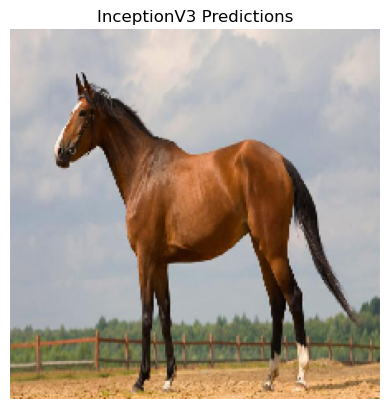

sorrel: 73.83%
hartebeest: 2.22%
horse_cart: 0.32%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


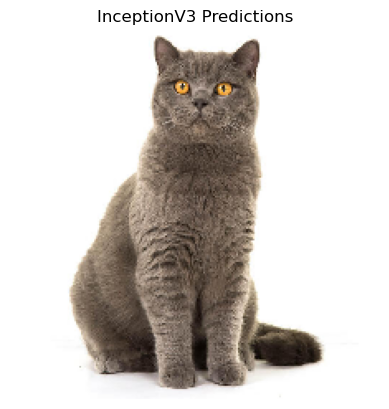

tiger_cat: 13.92%
tabby: 13.07%
Persian_cat: 12.80%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


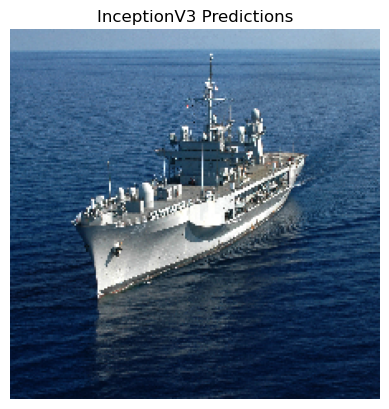

aircraft_carrier: 90.16%
liner: 0.36%
dock: 0.30%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


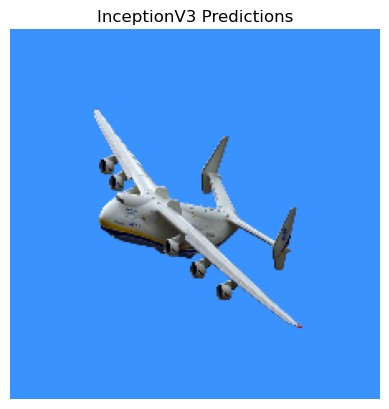

space_shuttle: 40.69%
wing: 21.62%
warplane: 14.49%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


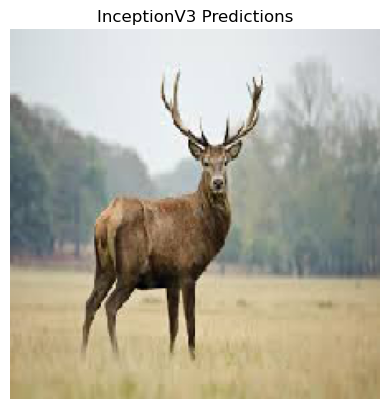

gazelle: 43.37%
hartebeest: 15.16%
ibex: 6.28%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


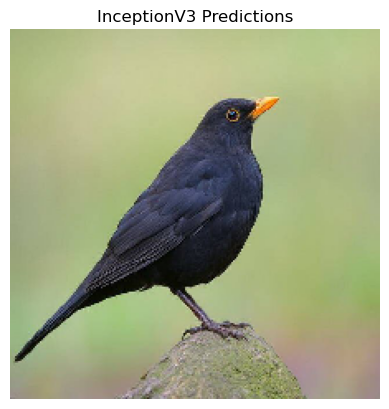

water_ouzel: 43.13%
magpie: 17.37%
junco: 3.66%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


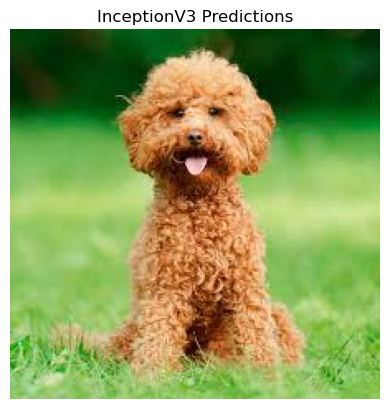

miniature_poodle: 39.58%
toy_poodle: 32.60%
standard_poodle: 4.17%
-----------------------------------


In [14]:
# Завантаження моделі InceptionV3
model_inception = InceptionV3(weights='imagenet')

# Розпізнаємо зображення за допомогою InceptionV3
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    prepared_img = prepare_image(img_path, target_size=(299, 299), preprocess_function=inception_preprocess)
    
    # Передбачення
    predictions = model_inception.predict(prepared_img)
    
    # Декодуємо передбачення
    decoded_predictions = inception_decode(predictions, top=3)[0]
    
    # Відображаємо зображення та результат
    display_predictions(img_path, decoded_predictions, "InceptionV3")